<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Region-and-Domain" data-toc-modified-id="Region-and-Domain-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Region and Domain</a></span></li><li><span><a href="#Research-Question" data-toc-modified-id="Research-Question-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Research Question</a></span></li><li><span><a href="#Links" data-toc-modified-id="Links-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Links</a></span></li><li><span><a href="#Image" data-toc-modified-id="Image-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Image</a></span></li><li><span><a href="#Discussion" data-toc-modified-id="Discussion-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Discussion</a></span></li><li><span><a href="#Script" data-toc-modified-id="Script-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Script</a></span></li></ul></div>

# <center>Assignment 4:  Becoming an Independent Data Scientist</center>

## Region and Domain
**Region:** Nottingham, United Kingdom

**Domain:** Renewable Energy

## Research Question

Modeling and performance calculation of two renewable energy systems:
    
- **System 1: Small Wind Turbine**
    - Modeling of small wind turbine based on experimental data obtained in a lab wind tunnel. This includes both mechanical and electrical power curves.
    
    - Plot the daily energy output of the turbine based on historical wind speed data for the whole year

- **System 2: Solar Photovoltaics**
    - Calculate the frequency distribution of the array hourly output and efficiency based on real installation data for the period given. Data from real installation includes weather and electricity generation(via separate DC volt and amp meters).
    
    - Model the PV module using pvlib library. This includes P-V and I-V curves at different solar radiations.

## Links

https://github.com/JMG1980/renewables/tree/master/Week4_Assignment

## Image

[Week 4: Renewable Energy Assesment](files/week4_image.png)

## Discussion

A person is considering making an investment and power a small range of appliances via a small wind turbine. The person is interested on knowing the electrical output that that particular turbine is likely to generate in Nottingham. The turbine is tested in a wind tunnel in a lab and the DC voltage and current are measured along with the wind speed entering the turbine. Based on the experimental results the turbine is modeled so its mechanical and electrical power output curves are calculated based for any given wind speed. The last step is to use historical wind speed data so the daily output can be calculated for the whole year and the person can take inform decisions such as battery size etc. The image shows the mechanical and electrical model for the turbine in one graph and the daily energy output from the turbine in the other one so the person can take informed decisions on making the investment.

On the other hand, this person has a PV array on the facade of a building and wants to know the hourly output of the system and the array performance based on weather data that is being collected on site. We can see from the graph that both questions are answered. Interestingly it seems that the efficiency of the Pv is quite low as compared to other installations, the reason for this is that the system is installed in a vertical wall. To compliment the study, a simple model of the photovoltaic panels is produced. For this the Pyhton pvlib library is used. When modelling PV systems a key aspect is to determine the voltage-curent and the power-voltage curves at different solar radiations. The images clearly show the characteristic curves for the PV module as well as an overlay of the maximum power points at different solar radiations.

## Script

In [54]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

[ 4.19500401e-01 -3.05369971e-14  2.11856616e-13 -4.29348114e-13]
        3             2
0.4195 x - 3.054e-14 x + 2.119e-13 x - 4.293e-13
[  0.75051247   5.23720365 -15.46627676]
        2
0.7505 x + 5.237 x - 15.47


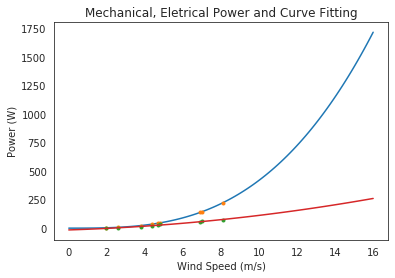

In [55]:
file = 'wind turbine lab results.xls'
df = pd.read_excel(file, sheet_name = 'Sheet1', skiprows = 1)
col = df.loc[: , 'Position 1':'Position 5']
df['Wind Velocity'] = col.mean(axis=1)
p_air = 1.29 #[kg/m3]
D = 0.91 #[m]
A = math.pi * (D/2)**2
df['Wk'] = 0.5 * p_air * A * df['Wind Velocity']**3
df['We'] = df['voltage'] * df['current']
df['eff'] = df['We'] / df['Wk']
x = df['Wind Velocity'].to_numpy()
y = df['Wk'].to_numpy()
poly_coeficient_mech = np.polyfit(x,y,3)
print(poly_coeficient_mech)
p = np.poly1d(poly_coeficient_mech)
print(p)
yelec = df['We'].to_numpy()
poly_coeficient_elec = np.polyfit(x,yelec,2)
print(poly_coeficient_elec)
p_elec = np.poly1d(poly_coeficient_elec)
print(p_elec)

x = np.linspace(0,16,100)

fx = []

for i in range(len(x)):
    fx.append(p[3]*x[i]**3 +p[2]*x[i]**2 +p[1]*x[i]+p[0])

fx_elec = []

for i in range(len(x)):
    fx_elec.append( p_elec[2]*x[i]**2 +p_elec[1]*x[i]+p_elec[0])
    
    
plt.plot(x,fx,'-',df['Wind Velocity'],df['Wk'],'.', df['Wind Velocity'],df['We'],'.', x, fx_elec,'-' )

plt.title('Mechanical, Eletrical Power and Curve Fitting')

plt.xlabel('Wind Speed (m/s)')
plt.ylabel('Power (W)')
plt.grid(False)
plt.savefig('Wind Turbine Model.svg')
plt.show()

/home/jab/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/jab/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


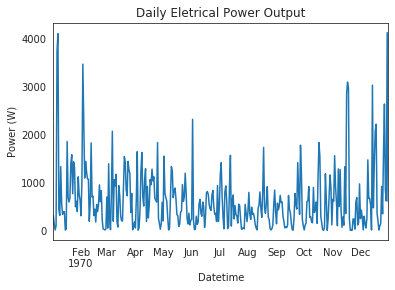

In [56]:
file = 'Nottingham_TRY.csv'
dfw = pd.read_csv(file)
dfw = dfw.set_index('Datetime')
dfw.index = pd.to_datetime(dfw.index)
dfg = dfw[dfw['ws'] > 2.57] # Min wind speed required for turbine model to generate power
dfg['W_k'] = p(dfg['ws'])
dfg['W_e'] = p_elec(dfg['ws'])
dfg['W_e'].resample('D').sum().plot()
plt.title('Daily Eletrical Power Output')
plt.ylabel('Power (W)')
plt.savefig('Wind Turbine Daily Output.svg')
plt.show()

In [57]:
import seaborn as sns
from pvlib import pvsystem
import datetime

PVsystem = {
    'n_modules': 24, #Number of modules
    'tilt': 39, #Degrees
    'n_mod_series': 13, #modules in series
    'n_array_parallel': 0.065, #arrays in parallel
    'Pinverter': 1.2, #kW
    'DC_V_datalogger_scale':0.1, #DC datalogger scale: 10 mV in the voltmeter = 1 DC Volt 
    'DC_I_datalogger_scale': 1/5, #DC datalogger scale: 5 mV in the Ammeter = 1 Amp
}

parameters = {
    'Name': 'BP275',
    'BIPV': 'N',
    'Date': '10/5/2009',
    'T_NOCT': 47,
    'A_c': 0.66,
    'N_s': 48,
    'I_sc_ref': 4.48,
    'V_oc_ref': 21.4,
    'I_mp_ref': 4.16,
    'V_mp_ref': 17,
    'alpha_sc': 0.002056,
    'beta_oc': -0.09636,
    'a_ref': 1.05347,
    'I_L_ref': 5.195649,
    'I_o_ref': 4.80738e-09,
    'R_s': 0.278062,
    'R_sh_ref': 339.72,
    'Adjust': 7.075894,
    'gamma_r': -0.6,
    'Version': 'MM106',
    'PTC': 72.5,
    'Technology': 'Mono-c-Si',
    'frame_area': 0.636,
    'T_Isc': 0.065, #%/C
    'T_V': 80, #mV/C
    'T_P': 0.5, #%/C
}

file = 'Monitoring PV system.xls'
df = pd.read_excel(file, sheet_name='PV 19-26March 29-4 april', skiprows=[0,1,2,3,4,5,5], skipfooter=2, )
#dfs = dfs.iloc[:, :-1]
df.columns=['date','time','logV', 'logA','logCounts','radiation', 'day_number', 'RH', 'Tamb']
#dfs.dtypes
df['Datetime'] =  df['date'].astype(str) + ' ' + df['time'].astype(str)
df = df.set_index('Datetime')
df = df.drop(['date','time'], axis=1)
df.index = pd.to_datetime(df.index)

df['DC_V'] = df['logV']/10
df['DC_A'] = df['logA']/5
df['DC_W'] = df['DC_V'] * df['DC_A']
df['radiation_norm'] = df['radiation']/ math.cos(math.radians(PVsystem['tilt']))
df['Array_eff'] = df['DC_W'] / (df['radiation_norm'] * PVsystem['n_modules'] * parameters['frame_area'])

# https://pvpmc.sandia.gov/modeling-steps/2-dc-module-iv/cell-temperature/pvsyst-cell-temperature-model/
alpha = 0.9
eta_m = 0.1
U0 = 15
U1 = 6.28
ave_windvel = 5
df['Tc'] = df['Tamb'] + df['radiation_norm'] * (alpha*(1-eta_m)/(U0+U1*ave_windvel))
#df

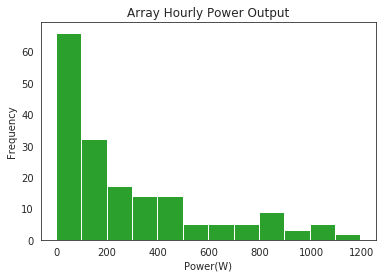

In [58]:
#Array Hourly Power Output
sns.set_style('white')
ax = df['DC_W'].resample('H').mean().plot.hist(color='C2', bins=12)
ax.set_ylabel('Frequency')
ax.set_xlabel('Power(W)')
ax.set_title('Array Hourly Power Output')
plt.savefig('Array Horly Output.svg')
plt.show()

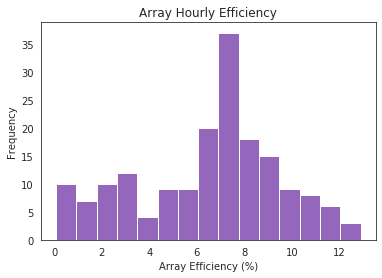

In [59]:
#Array Hourly Efficiency
ax = (df['Array_eff']*100).resample('H').mean().plot.hist(color='C4',bins=15)
ax.set_ylabel('Frequency')
ax.set_xlabel('Array Efficiency (%)')
ax.set_title('Array Hourly Efficiency')
plt.savefig('Array Horly Efficiency.svg')
plt.show()

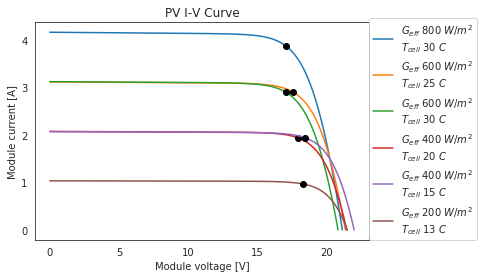

       i_sc       v_oc      i_mp       v_mp       p_mp
0  4.162018  21.145073  3.863332  17.106873  66.089528
1  3.115859  21.362194  2.904249  17.567198  51.019515
2  3.122024  20.837115  2.900855  17.050864  49.462086
3  2.073469  21.466728  1.938446  17.934988  34.766001
4  2.069358  21.997322  1.939297  18.467530  35.814021
5  1.034026  21.508913  0.968852  18.274834  17.705612


In [60]:
# Cases below based on performance of real system as per data above. 

cases = [
    (800, 30),
    (600, 25),
    (600, 30),
    (400, 20),
    (400, 15),
    (200, 13)
]

conditions = pd.DataFrame(cases, columns=['Geff', 'Tcell'])

# adjust the reference parameters according to the operating
# conditions using the De Soto model:
IL, I0, Rs, Rsh, nNsVth = pvsystem.calcparams_desoto(
    conditions['Geff'],
    conditions['Tcell'],
    alpha_sc=parameters['alpha_sc'],
    a_ref=parameters['a_ref'],
    I_L_ref=parameters['I_L_ref'],
    I_o_ref=parameters['I_o_ref'],
    R_sh_ref=parameters['R_sh_ref'],
    R_s=parameters['R_s'],
    EgRef=1.121,
    dEgdT=-0.0002677
)

# plug the parameters into the SDE and solve for IV curves:
curve_info = pvsystem.singlediode(
    photocurrent=IL,
    saturation_current=I0,
    resistance_series=Rs,
    resistance_shunt=Rsh,
    nNsVth=nNsVth,
    ivcurve_pnts=100,
    method='lambertw'
)

# plot the calculated curves:
plt.figure()
for i, case in conditions.iterrows():
    label = (
        "$G_{eff}$ " + f"{case['Geff']} $W/m^2$\n"
        "$T_{cell}$ " + f"{case['Tcell']} $C$"
    )
    plt.plot(curve_info['v'][i], curve_info['i'][i], label=label)
    v_mp = curve_info['v_mp'][i]
    i_mp = curve_info['i_mp'][i]
    # mark the MPP
    plt.plot([v_mp], [i_mp], ls='', marker='o', c='k')

plt.legend(loc=(1.0, 0))
plt.xlabel('Module voltage [V]')
plt.ylabel('Module current [A]')
plt.title('PV I-V Curve')
plt.savefig('PV I-V Curve.svg')
plt.show()


# draw trend arrows
def draw_arrow(ax, label, x0, y0, rotation, size, direction):
    style = direction + 'arrow'
    bbox_props = dict(boxstyle=style, fc=(0.8, 0.9, 0.9), ec="b", lw=1)
    t = ax.text(x0, y0, label, ha="left", va="bottom", rotation=rotation,
                size=size, bbox=bbox_props, zorder=-1)

    bb = t.get_bbox_patch()
    bb.set_boxstyle(style, pad=0.6)


print(pd.DataFrame({
    'i_sc': curve_info['i_sc'],
    'v_oc': curve_info['v_oc'],
    'i_mp': curve_info['i_mp'],
    'v_mp': curve_info['v_mp'],
    'p_mp': curve_info['p_mp'],
}))

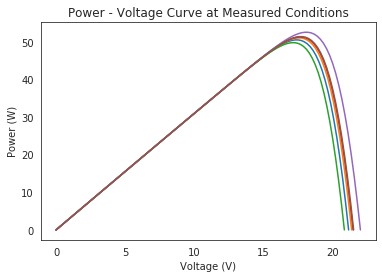

In [61]:
points = [0,1,2,3,4,5]
for i in points:
    plt.plot(curve_info['v'][i],curve_info['i'][1]*curve_info['v'][i] ,label=label)
plt.title('Power - Voltage Curve at Measured Conditions')
plt.xlabel('Voltage (V)')
plt.ylabel('Power (W)')
plt.savefig('PV P-V Curve.svg')
plt.show()